<a href="https://colab.research.google.com/github/ThrishaJawahar/Falcon-9-Launch-Prediction/blob/main/EDAwithVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectives:

Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

1. Exploratory Data Analysis
2. Preparing Data Feature Engineering

TASK 1: Visualize the relationship between Flight Number and Launch Site


In [6]:
!pip install seaborn pandas matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
dataset = io.StringIO(response.text)
df = pd.read_csv(dataset)


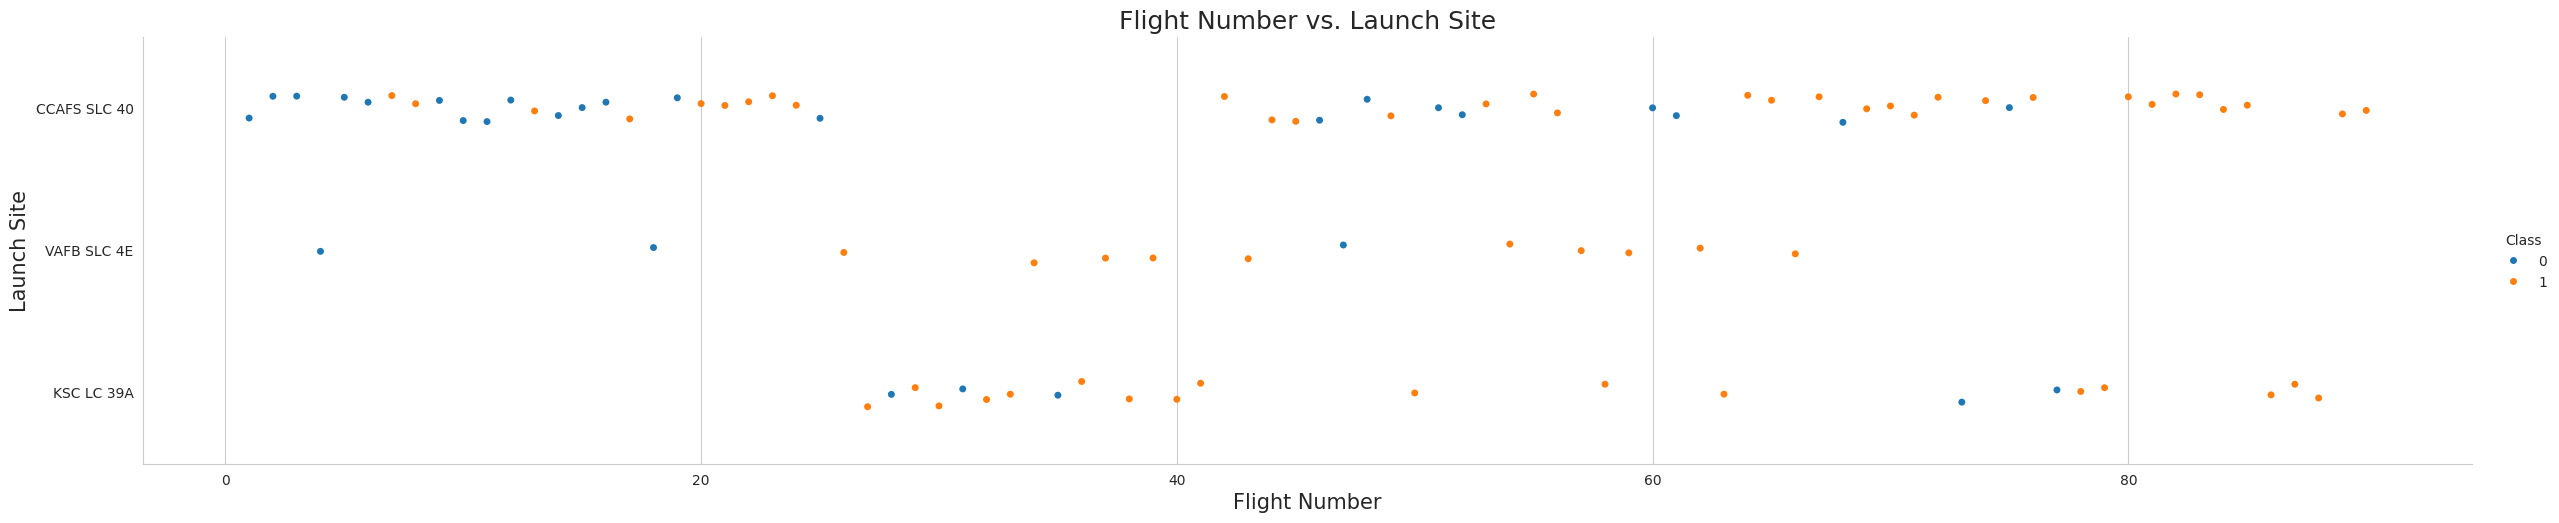

In [5]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=5, kind="strip")
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs. Launch Site", fontsize=18)  # Optional title
plt.show()


TASK 2: Visualize the relationship between Payload Mass and Launch Site

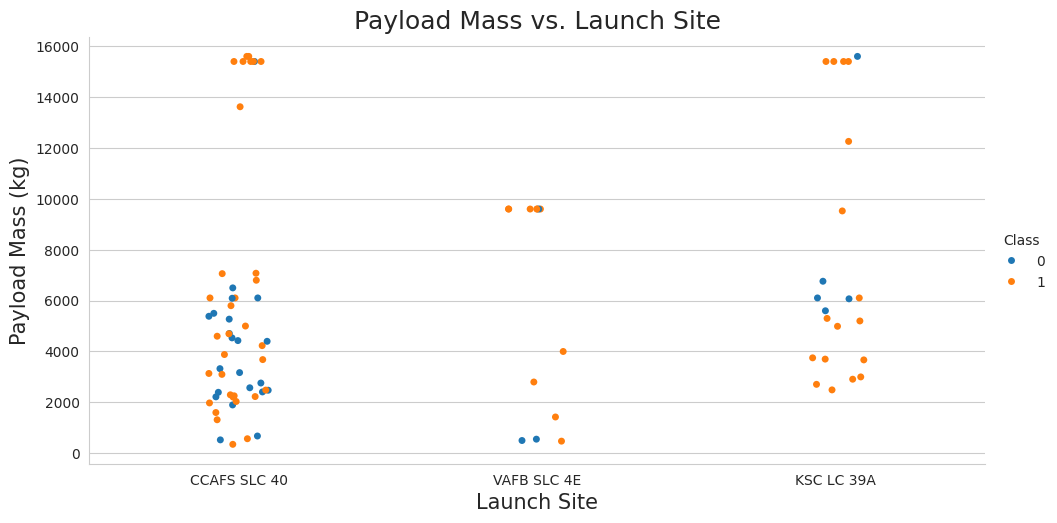

In [4]:
sns.catplot(x="LaunchSite", y="PayloadMass", hue="Class", data=df, aspect=2, kind="strip")
plt.xlabel("Launch Site", fontsize=15)
plt.ylabel("Payload Mass (kg)", fontsize=15)
plt.title("Payload Mass vs. Launch Site", fontsize=18)  # Optional title
plt.show()

TASK 3: Visualize the relationship between success rate of each orbit type

<ipython-input-7-ae3009815292>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Orbit", y="SuccessRate", data=orbit_success_rate, palette="viridis")


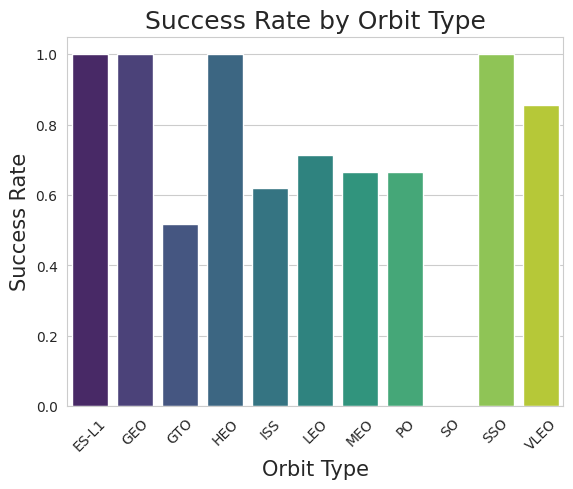

In [7]:
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()
orbit_success_rate.rename(columns={"Class": "SuccessRate"}, inplace=True)
sns.barplot(x="Orbit", y="SuccessRate", data=orbit_success_rate, palette="viridis")
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=18)
plt.xticks(rotation=45)
plt.show()

TASK 4: Visualize the relationship between FlightNumber and Orbit type

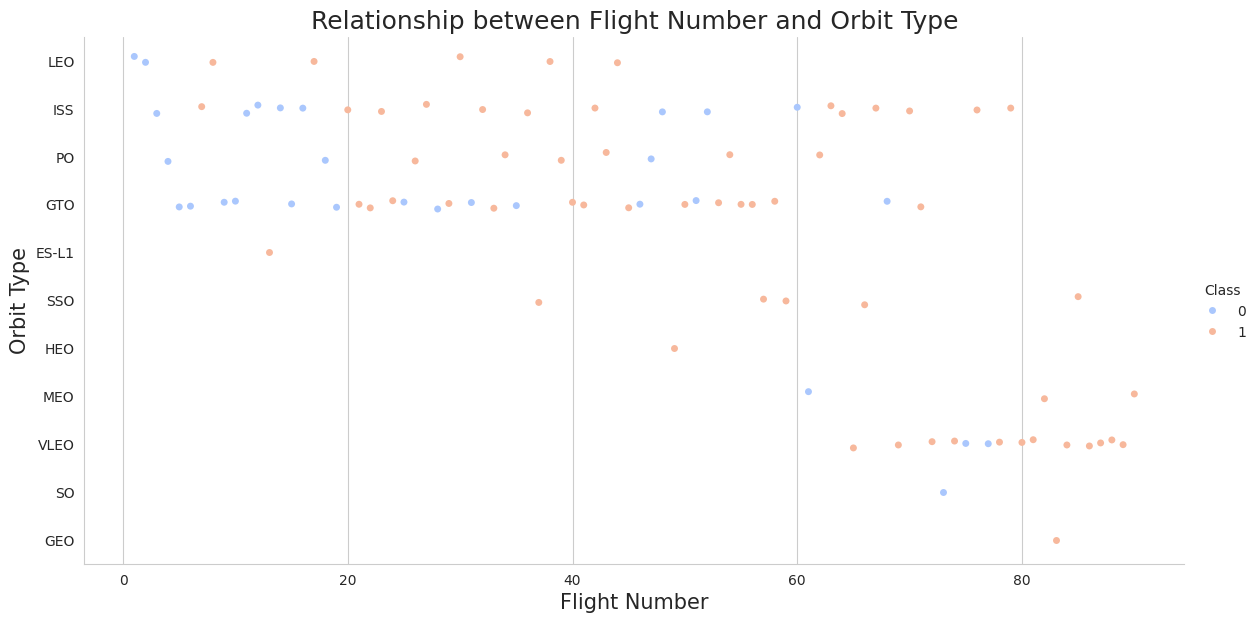

In [8]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, kind="strip", height=6, aspect=2, palette="coolwarm")
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=18)
plt.show()

TASK 5: Visualize the relationship between Payload Mass and Orbit type

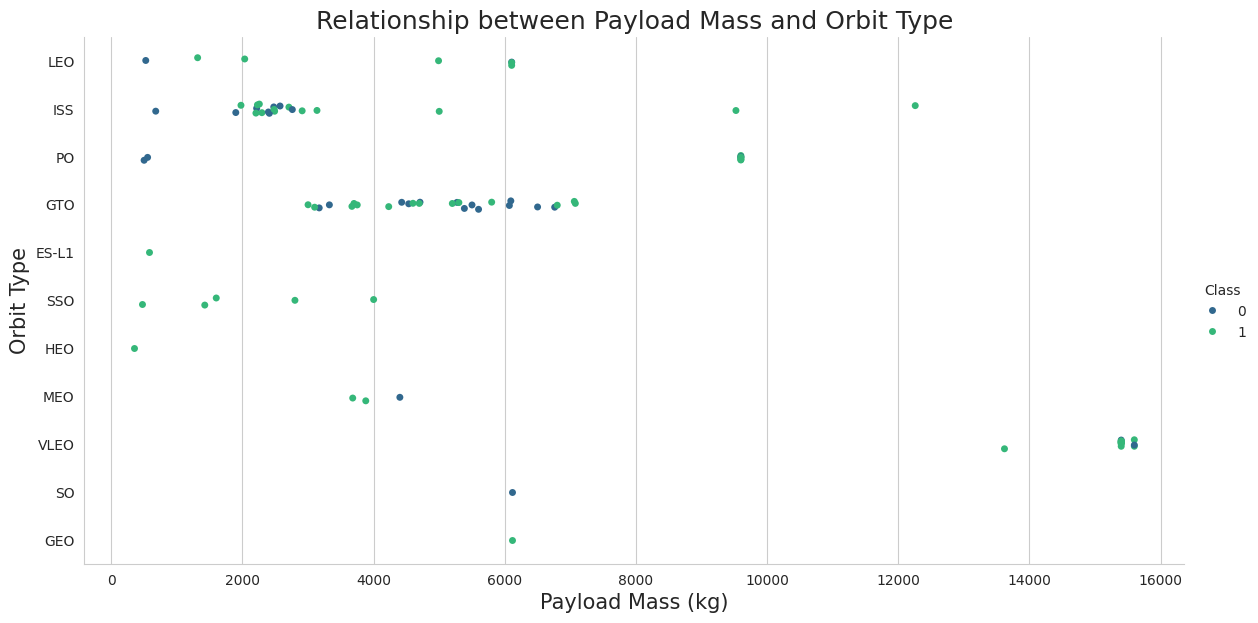

In [9]:
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, kind="strip", height=6, aspect=2, palette="viridis")
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship between Payload Mass and Orbit Type", fontsize=18)
plt.show()

TASK 6: Visualize the launch success yearly trend

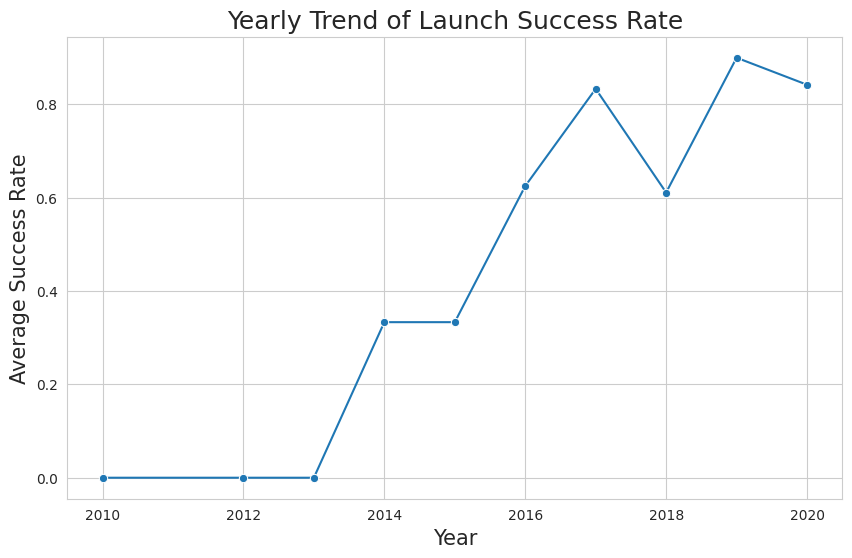

In [10]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
success_rate_per_year = df.groupby('Year')['Class'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=success_rate_per_year.index, y=success_rate_per_year.values, marker='o')
plt.title("Yearly Trend of Launch Success Rate", fontsize=18)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Success Rate", fontsize=15)
plt.grid(True)
plt.show()

In [11]:
distinct_launch_sites = df['LaunchSite'].unique()
print(distinct_launch_sites)

['CCAFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']


TASK 7: Create dummy variables to categorical columns

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
               'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [14]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


TASK 8: Cast all numeric columns to float64

In [15]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

,0
FlightNumber,float64
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64
...,...
Serial_B1056,float64
Serial_B1058,float64
Serial_B1059,float64
Serial_B1060,float64


In [16]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)